Imports

In [16]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import helpers.evaluate
from helpers.model_list import model_map
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

#Import models
models = {name: model_class() for name, model_class in model_map.items()}

Load in Data

In [17]:
df = pd.read_csv("diabetes_binary_5050split_health_indicators_BRFSS2015.csv")
X = df.drop(columns=["Diabetes_binary"])
y = df["Diabetes_binary"]
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


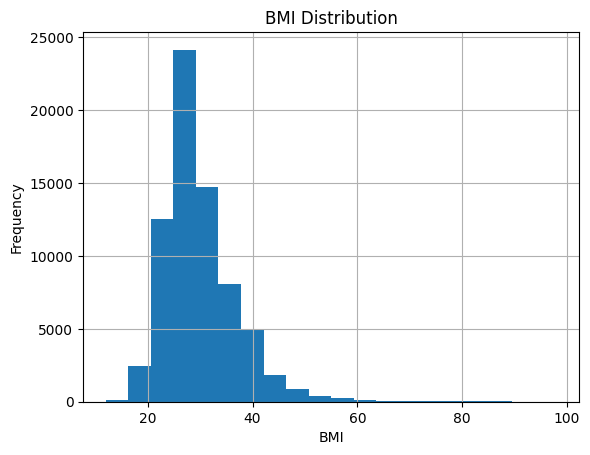

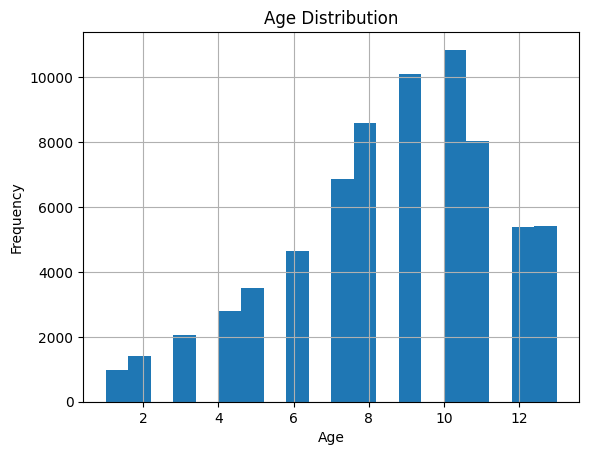

In [18]:
# Univariate Analysis
plt.figure()
df['BMI'].hist(bins=20)
plt.title("BMI Distribution")
plt.xlabel("BMI")
plt.ylabel("Frequency")
plt.show()

plt.figure()
df['Age'].hist(bins=20)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


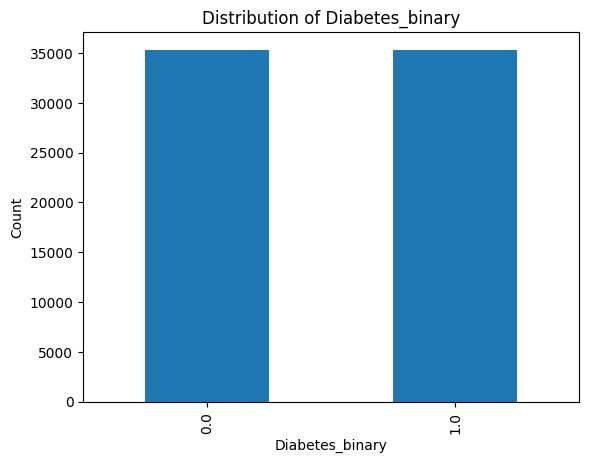

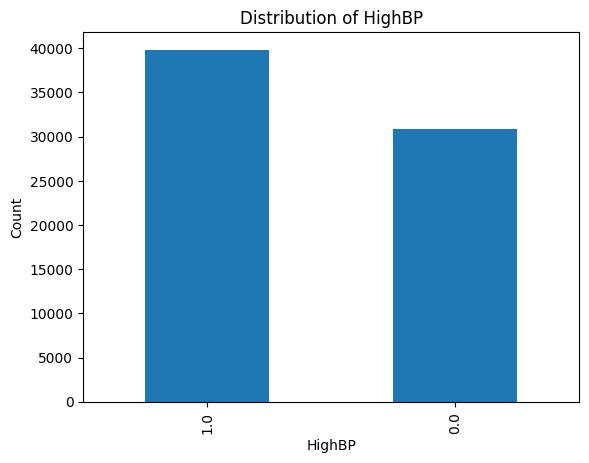

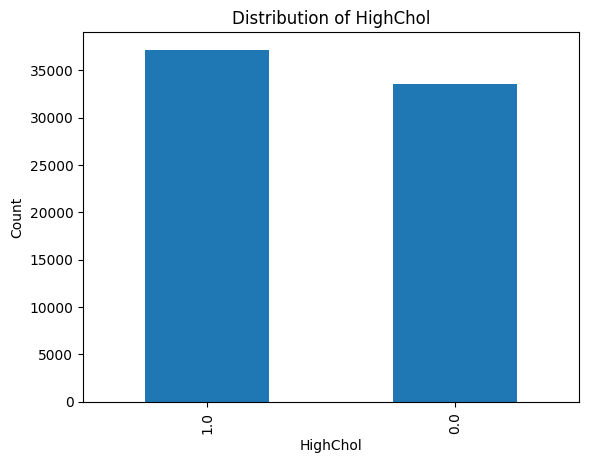

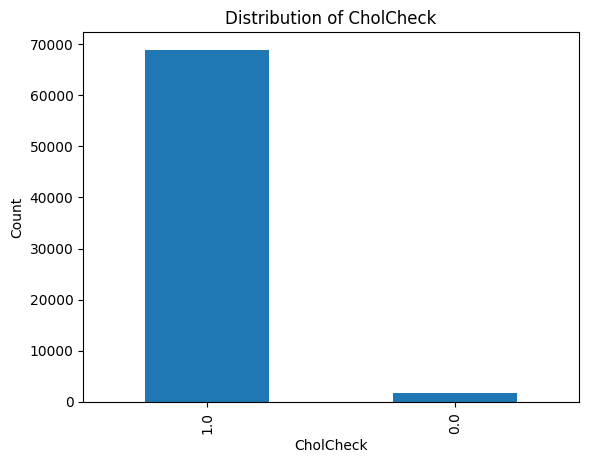

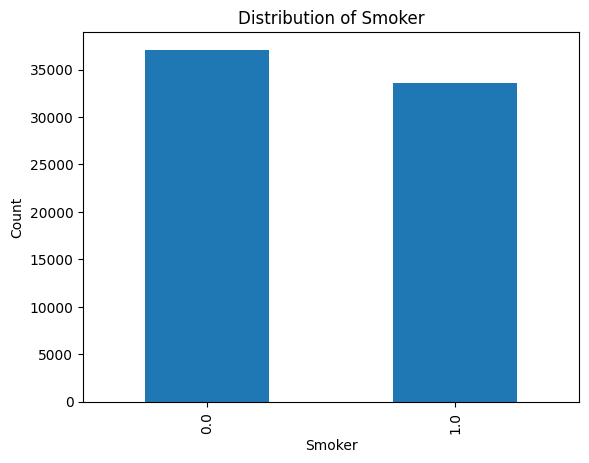

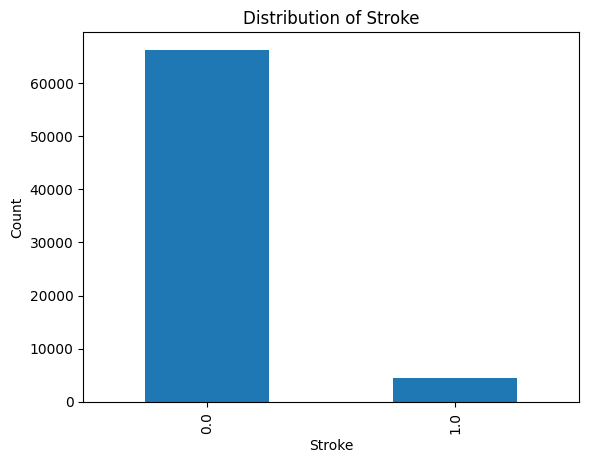

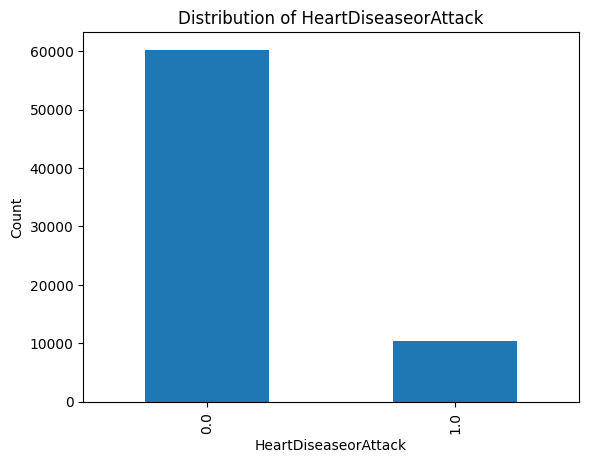

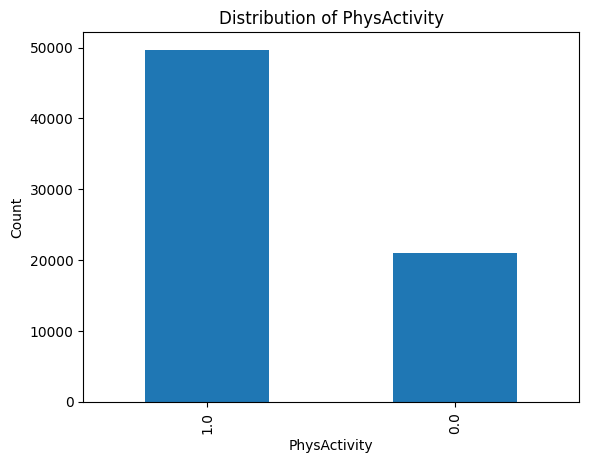

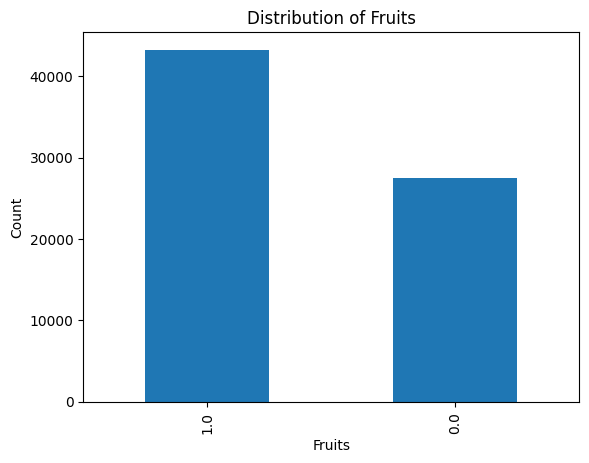

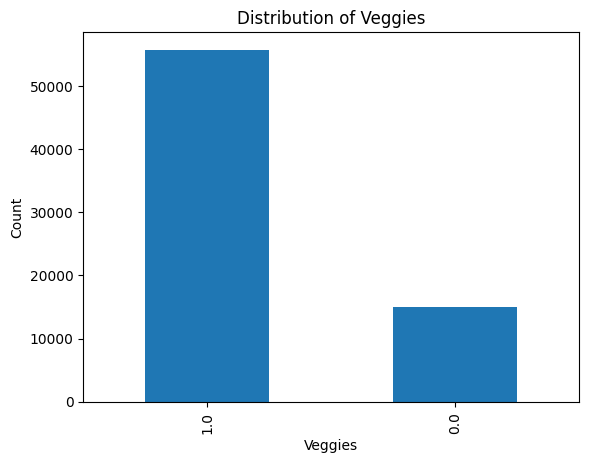

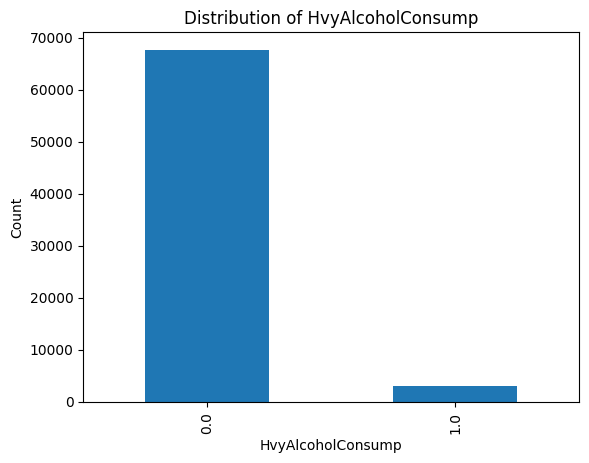

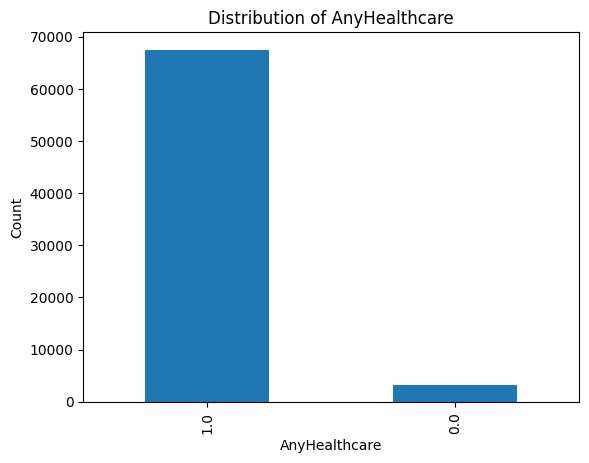

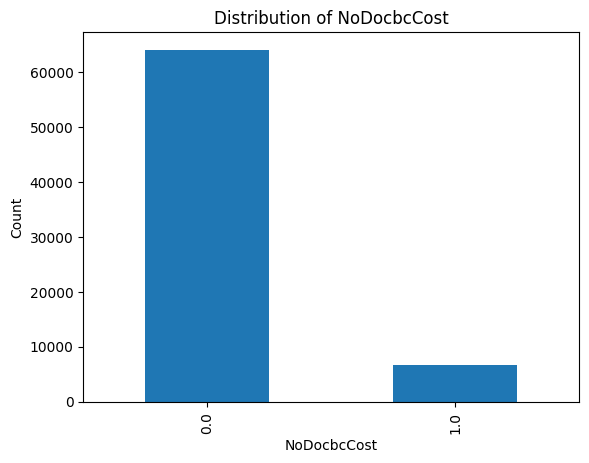

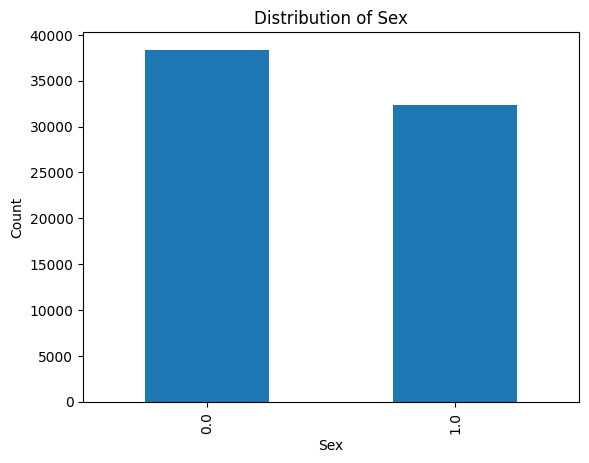

In [19]:
# Identify categorical/binary features to visualize their distributions.

categorical_features = [
    'Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck',
    'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity',
    'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare',
    'NoDocbcCost', 'Sex'
]

for col in categorical_features:
    plt.figure()
    df[col].value_counts().plot(kind='bar')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

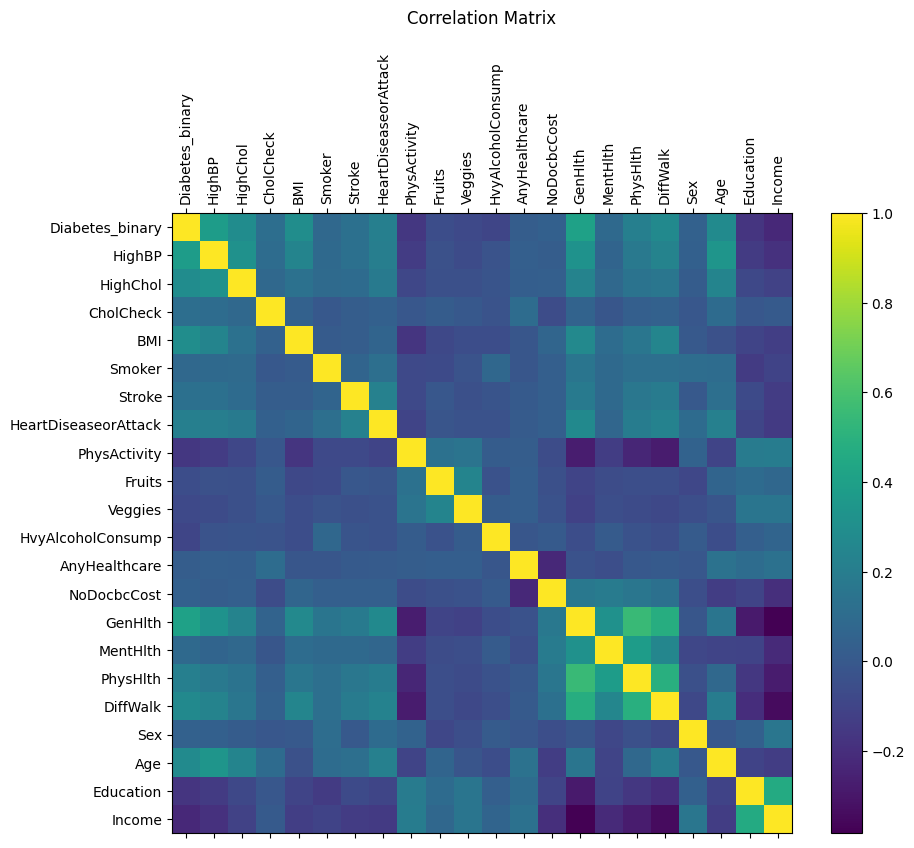

In [20]:
# Mulitvariate analysis

corr_matrix = df.corr()

plt.figure(figsize=(10, 8))
plt.matshow(corr_matrix, fignum=1)
plt.title("Correlation Matrix", pad=20)
plt.colorbar()
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix.index)), corr_matrix.index)
plt.show()

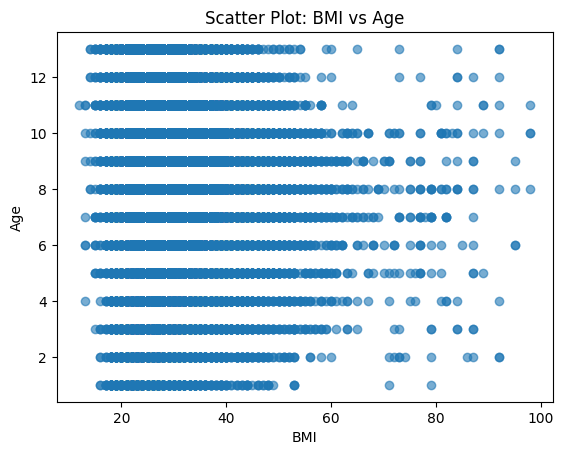

In [21]:
# 2. Scatter Plot: BMI vs Age 
plt.figure()
plt.scatter(df['BMI'], df['Age'], alpha=0.6)
plt.title("Scatter Plot: BMI vs Age")
plt.xlabel("BMI")
plt.ylabel("Age")
plt.show()

Explore Data

In [22]:
print("Dataset shape:", df.shape)
print("\nData types:")
print(df.dtypes)


Dataset shape: (70692, 22)

Data types:
Diabetes_binary         float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object


In [23]:
print("\nSummary statistics:")
print(df.describe())


Summary statistics:
       Diabetes_binary        HighBP      HighChol     CholCheck  \
count     70692.000000  70692.000000  70692.000000  70692.000000   
mean          0.500000      0.563458      0.525703      0.975259   
std           0.500004      0.495960      0.499342      0.155336   
min           0.000000      0.000000      0.000000      0.000000   
25%           0.000000      0.000000      0.000000      1.000000   
50%           0.500000      1.000000      1.000000      1.000000   
75%           1.000000      1.000000      1.000000      1.000000   
max           1.000000      1.000000      1.000000      1.000000   

                BMI        Smoker        Stroke  HeartDiseaseorAttack  \
count  70692.000000  70692.000000  70692.000000          70692.000000   
mean      29.856985      0.475273      0.062171              0.147810   
std        7.113954      0.499392      0.241468              0.354914   
min       12.000000      0.000000      0.000000              0.000000   
2

In [24]:
# Count missing values in each column
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64


In [25]:
# Check for duplicate records
print("\nNumber of duplicate rows:", df.duplicated().sum())


Number of duplicate rows: 1635


Clean Data

In [26]:
print("Dataset shape:", df.shape)
df = df.drop_duplicates()
print("New shape:", df.shape)

Dataset shape: (70692, 22)
New shape: (69057, 22)


Split Data

In [27]:
#Transform target
le = LabelEncoder()
y = le.fit_transform(y)

#Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8)

#Scale Data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Reassign col names
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)


Train Models


--- Training and Evaluating Decision Tree ---
Decision Tree Performance:
Accuracy:  0.6521
Precision: 0.6521
Recall:    0.6521
F1 Score:  0.6521
Confusion Matrix:
[[18369  9910]
 [ 9764 18511]]


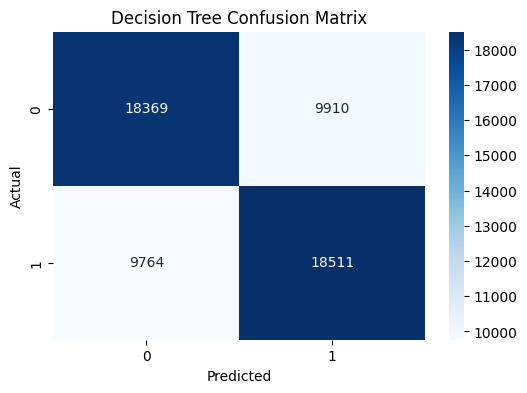


--- Training and Evaluating Logistic Regression ---
Logistic Regression Performance:
Accuracy:  0.7480
Precision: 0.7487
Recall:    0.7480
F1 Score:  0.7478
Confusion Matrix:
[[20359  7920]
 [ 6334 21941]]


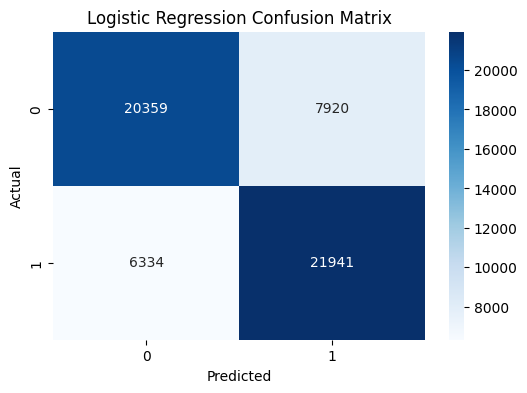


--- Training and Evaluating K Nearest Neighbors ---
K Nearest Neighbors Performance:
Accuracy:  0.6993
Precision: 0.7001
Recall:    0.6993
F1 Score:  0.6990
Confusion Matrix:
[[18876  9403]
 [ 7601 20674]]


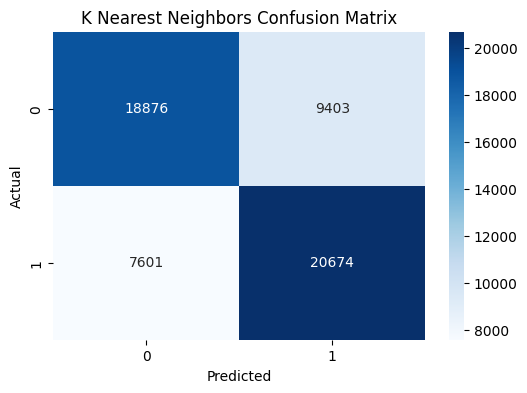


--- Training and Evaluating SVC ---
SVC Performance:
Accuracy:  0.7448
Precision: 0.7490
Recall:    0.7448
F1 Score:  0.7437
Confusion Matrix:
[[19230  9049]
 [ 5385 22890]]


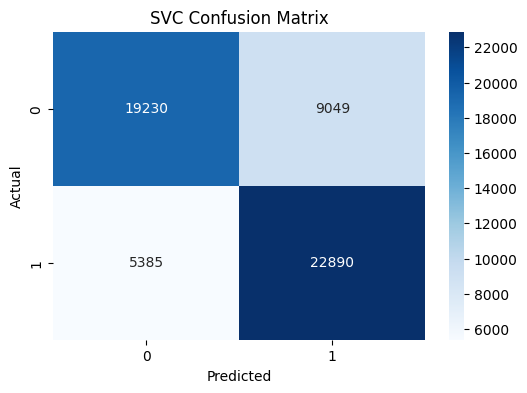


--- Training and Evaluating AdaBoost ---


C:\Users\Seth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost Performance:
Accuracy:  0.7483
Precision: 0.7492
Recall:    0.7483
F1 Score:  0.7481
Confusion Matrix:
[[20316  7963]
 [ 6272 22003]]


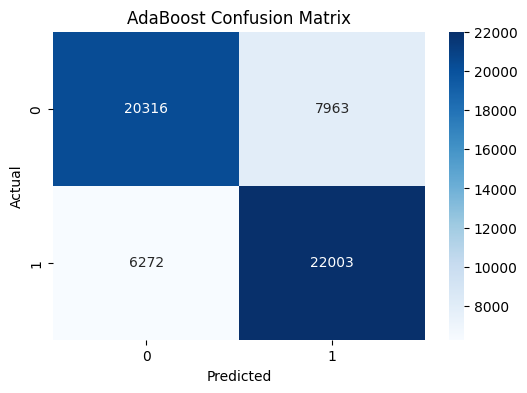


--- Training and Evaluating Bagging ---
Bagging Performance:
Accuracy:  0.7012
Precision: 0.7014
Recall:    0.7012
F1 Score:  0.7011
Confusion Matrix:
[[20333  7946]
 [ 8955 19320]]


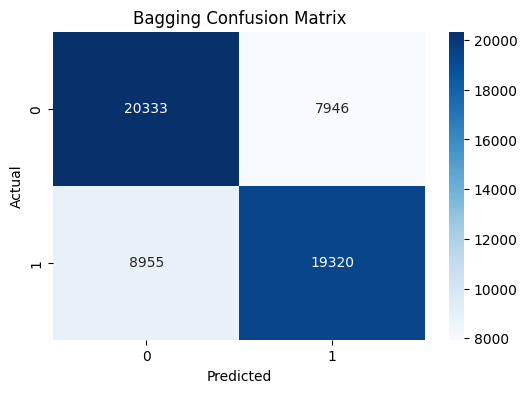


--- Training and Evaluating Gradient Boosting ---
Gradient Boosting Performance:
Accuracy:  0.7517
Precision: 0.7536
Recall:    0.7517
F1 Score:  0.7512
Confusion Matrix:
[[20017  8262]
 [ 5781 22494]]


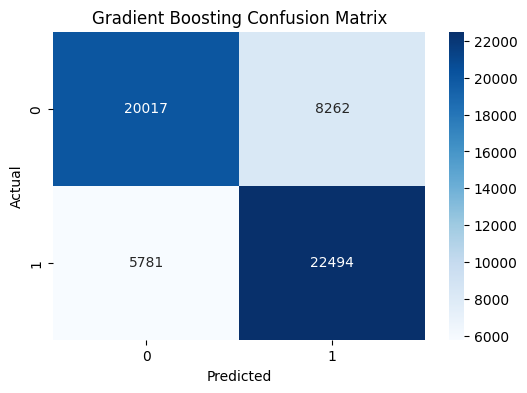


--- Training and Evaluating Random Forest ---
Random Forest Performance:
Accuracy:  0.7387
Precision: 0.7404
Recall:    0.7387
F1 Score:  0.7382
Confusion Matrix:
[[19677  8602]
 [ 6178 22097]]


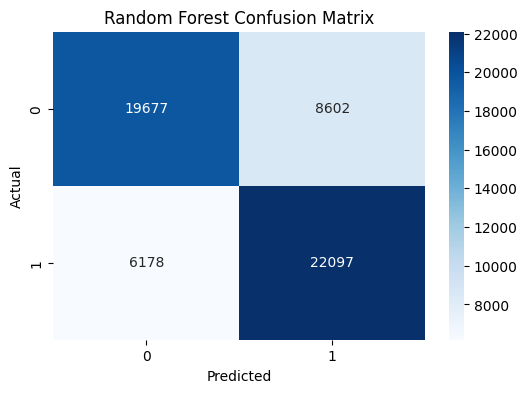


--- Training and Evaluating Stacking ---
Stacking Performance:
Accuracy:  0.7002
Precision: 0.7010
Recall:    0.7002
F1 Score:  0.6999
Confusion Matrix:
[[18891  9388]
 [ 7568 20707]]


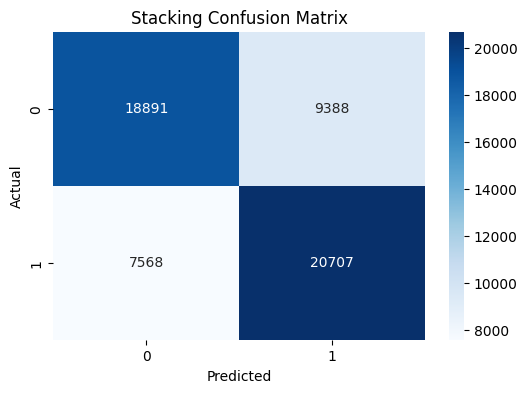

In [28]:


total_metrics = {}

for name, model in models.items():
    print(f"\n--- Training and Evaluating {name} ---")
    model.train(X_train_scaled, y_train)
    
    predictions = model.predict(X_test_scaled)
    
    metrics = helpers.evaluate.evaluate_model(y_test, predictions, name)
    total_metrics[name] = metrics


Report Stats

In [29]:
# Get best metrics
bestModel = ""
bestPerformance = 0.0
for name, metrics in total_metrics.items():
    if metrics["Accuracy"] > bestPerformance:
        bestModel = name
        bestPerformance = metrics["Accuracy"]

print("Best Model =", bestModel)
print("Model Accuracy =", bestPerformance)


Best Model = Gradient Boosting
Model Accuracy = 0.7516886515542667


Hyperparameter Tuning

In [31]:
svc = models["SVC"]
svc.tune_hyperParams(X_test_scaled, y_test)

[I 2025-04-18 09:59:02,545] A new study created in memory with name: SVC
[W 2025-04-18 09:59:04,373] Trial 0 failed with parameters: {'svc_c': 749723.1697800279, 'svc_kernel': 'rbf'} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "C:\Users\Seth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\optuna\study\_optimize.py", line 197, in _run_trial
    value_or_values = func(trial)
                      ^^^^^^^^^^^
  File "c:\Users\Seth\Desktop\Spring 25\Algorithm\Project\CIS4930-ML-Project\models\svc.py", line 31, in <lambda>
    study.optimize(lambda trial: self.objective(trial, x, y), n_trials=100)
                                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Seth\Desktop\Spring 25\Algorithm\Project\CIS4930-ML-Project\models\svc.py", line 25, in objective
    score = cross_val_score(classifier_obj, x, y, n_jobs=-1, cv=cv)
            ^^^^^^^^^^^^^^^^^

KeyboardInterrupt: 